In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dropping Continuous Features 

In [3]:
cont_features = ['PassengerId','Pclass','Name','Age','SibSp','Parch','Fare']
titanic.drop(cont_features,axis = 1, inplace = True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


## Exploring Categorical Features 

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Survived    891 non-null int64
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [5]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


Cabin is the only ouput as its the only continuous variable in left in the dataset. Cabin = True means that cabin value is missing. Around 70% of those without cabin information to their records died.

In [6]:
titanic['Cabin_int'] = np.where(titanic['Cabin'].isnull(),0,1) # creates value of 0 if cabin info is null and 1 otherwise.
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_int
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0


Cabin is encoded as an indicater variable.

## Plotting Categorical Features 

<Figure size 432x288 with 0 Axes>

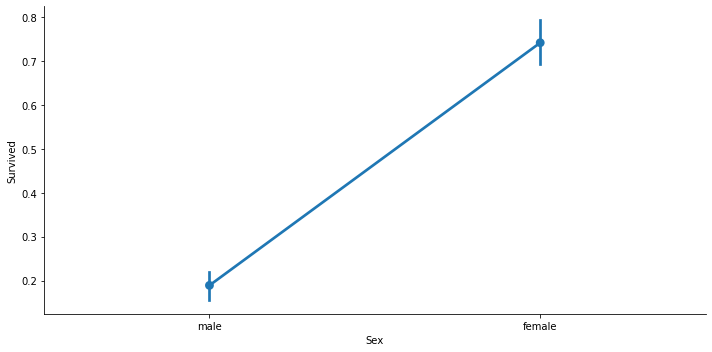

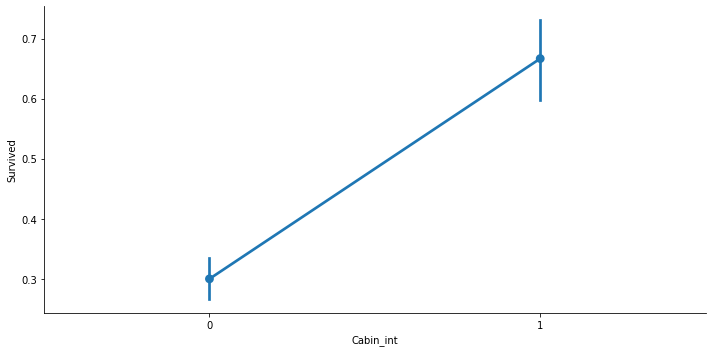

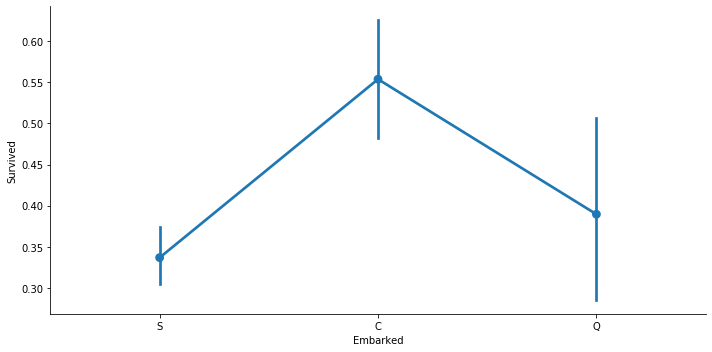

In [7]:
for i,col in enumerate(['Sex','Cabin_int','Embarked']):
    plt.figure(i)
    sns.catplot(x = col,y = 'Survived', data = titanic, kind = 'point', aspect = 2)

Information for embarked - C = Cherbourg, Q = Queenstown, S = Southampton

In [8]:
titanic.pivot_table('Survived',index = 'Sex', columns = 'Embarked', aggfunc = 'count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In Southampton, double the number of men boarded compared to women. Thats why the survival ratio is so low for Southampton.

In [10]:
titanic.pivot_table('Survived',index = 'Cabin_int',columns = 'Embarked', aggfunc = 'count')

Embarked,C,Q,S
Cabin_int,,,
0,99,73,515
1,69,4,129


Cherbourg's higher survival rate can also be explained by the fact that % of people who had cabins is greater than similar values for Queenstown and Southampton. 